### 1. Initializing libraries

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import PIL as pil
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



### 2. Getting Data Ready 

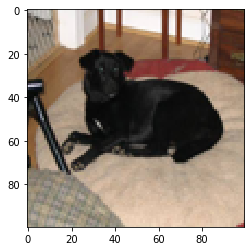

In [4]:
# To display sample image from repository.

image = pil.Image.open('/kaggle/input/dogs-vs-cats/train/train/dog.3276.jpg')
# print(image.format) 
# print(image.size) 
# print(image.mode)
# image.close()
# len(os.listdir("/kaggle/input/dogs-vs-cats/test/test"))

image = image.resize((100,100))
np_pixels_l = np.asarray(image)
image.close()
plt.imshow(np_pixels_l)

In [ ]:
# Getting Train and Test Data ready for dog and cat images.

# cat - 0, dog - 1

training_length = len(os.listdir("/kaggle/input/dogs-vs-cats/train/train")) 
train_y = np.zeros(training_length, int)
train_X = np.zeros([12288, training_length], np.float128)

for index, file_name in enumerate(os.listdir("/kaggle/input/dogs-vs-cats/train/train")):
    image = pil.Image.open('/kaggle/input/dogs-vs-cats/train/train/' + file_name)
    image = image.resize((64,64))
    np_pixels = np.asarray(image)
    
    #will get (64, 64, 3) of each image, we have to reshape to convert into (12228,1)
    
    image.close()
    np_pixels = np_pixels.reshape(12288,)
    train_X[:,index] = np_pixels
    if file_name.startswith('cat'):
        train_y[index] = 0
    else:
        train_y[index] = 1


In [ ]:
# Normalizing each pixel value since highest value will be 255 so dividing it with same.
train_X = train_X / 255

In [ ]:
train_X[:,1]

In [ ]:
len(train_X[train_X == 0])

In [ ]:
train_y = train_y.T.reshape([1, 25000])

In [ ]:
train_y.shape

### 2. Start Building Single Layer NN from Scratch

#### Creating Helper Functions

In [ ]:
# Activation function

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

#### Initializing Parameters

In [1]:
# Initializing parameters (weights and constant)

def initialize_parameters(shape):
    
    w = np.zeros([shape, 1])
    b = 0
    return w, b

In [ ]:
#Example to test function

dim = 2
w, b = initialize_parameters(dim)
print ("w = " + str(w))
print ("b = " + str(b))

#### Forward and Backward Propagation

In [ ]:
# Function to calculate propagation

def propagation(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = (-1 / m) * (np.sum(np.multiply(Y, np.log(A)) + (np.multiply(1 - Y, np.log(1 - A)))))

    # BACKWARD PROPAGATION (TO FIND GRAD)    

    dw = (1 / m) * (np.dot(X, (np.subtract(A, Y).T)))
    db = (1 / m) * np.sum((np.subtract(A, Y)))
    
#     cost = np.squeeze(cost)
#     print("Cost---", cost)
    grads = {"dw" : dw, 
             "db" : db}
    
    return grads, cost

In [ ]:
# Example to test propagation function.

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagation(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

#### Optimization

In [ ]:
# Calculating and updating weights for n iterations.

def optimization(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for index in range(num_iterations):
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagation(w, b, X, Y)
    
        dw = grads["dw"]
        db = grads["db"]
    
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
    
        # Record the costs
        if index % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if index % 100 == 0:
            print ("Cost after iteration %i: %f" %(index, cost))
#             print("Grads -- dw and db --", grads["dw"], grads["db"])
        
    params = {"w" : w, "b" : b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, cost

In [ ]:
# Testing above function

params, grads, costs = optimization(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

#### Predicting Test/Train data

In [ ]:
# Predicting on basis of weights and bias

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    for index in range(A.shape[1]):
        if A[0][index] > 0 and A[0][index] <= 0.5:
            Y_prediction[0][index] = 0
        else:
            Y_prediction[0][index] = 1
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

In [ ]:
# Clubbing all together function to make single layer Nueral network model. 

def model(X_train, Y_train, num_iterations = 1000, learning_rate=0.05):
    
    #initialize parameters
    w, b = np.zeros([len(X_train), 1]), 0
#     w, b = initialize_parameters(X_train.shape[0])

    parameters, grads, costs = optimization(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)
#     Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    
    d = {"costs": costs,          
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_X, train_y)

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [ ]:
image = image.resize((64,64))
np_data = np.asarray(image)
print(np_data.shape)

plt.imshow(image)

## Deep L Layer Network

### Helper Function

In [26]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def relu(x):
    return np.maximum(x, 0)

In [25]:
def initialize_parameters_deep(layers_dim):
    
    L = len(layers_dim)
    parameters = {}
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layers_dim[l], layers_dim[l-1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layers_dim[l], 1))

    return parameters

## Forward Propagation Module

### 1. Linear Forward

In [5]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    
    cache = (A, W, b)
    
    return Z, cache

### Linear Activation Forward

In [6]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A = relu(Z)

    activation_cache = Z
    cache = (linear_cache, activation_cache)

    return A, cache

### L- Layer Forwarded Model

In [7]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    num_l = len(parameters) // 2

    for l in range(1, num_l):        
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters["W" + str(num_l)], parameters["b" + str(num_l)], "sigmoid")
    caches.append(cache)

  # Return last output and all caches(stored parameters) to calculate back prop
    return AL, caches

## Computing Cost

In [8]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]
  
    cost = - np.sum((np.multiply(Y, np.log(AL)) + np.multiply(np.subtract(1, Y), np.log(np.subtract(1, AL))))) / m
    cost = np.squeeze(cost)
  
    return cost

## Backward Propagation

### Linear Backward

In [9]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1] 

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

### Linear Activation Backward

In [10]:
def relu_backward(dA, activation):
    
    Z = activation
    Z[Z <= 0] = 0
    Z[Z > 0] = 1
  
    dZ = dA * Z

    return dZ

def sigmoid_backward(dA, activation):
    
    Z = activation
  
    dZ = (sigmoid(Z) * (1 - sigmoid(Z)))

    dZ = dA * dZ
    
    return dZ 

In [11]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)    
        
    elif activation == "sigmoid":         
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

### L- Layer Backward Model

In [12]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL) - np.divide(1-Y, 1-AL))

    current_cache = caches[L - 1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")

    for l in reversed(range(L - 1)):        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### Update Parameters

In [13]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])

    return parameters

## Stacking all functions into Model

In [14]:
def model(X, Y, dim_layers, iterations, learning_rate):

    parameters = initialize_parameters_deep(dim_layers)
    costs = []
    cost = None
    for i in range(iterations):

        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)

      # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters


## Prediction

In [15]:
def predict(X, parameters):

    AL, cache = L_model_forward(X, parameters)
    predictions = np.array([1 if activation > 0.5 else 0 for activation in AL.T])

    return predictions

## Training

In [16]:
training_length = 5000
testing_length = int(0.2 * training_length) 
num_px = 100

In [28]:
import os
file_dir = '/kaggle/input/dogs-vs-cats/train/train/'
train_L_y = np.zeros(training_length, int)
train_L_X = np.zeros([training_length, num_px , num_px, 3],dtype=np.uint8)

for index, file_name in enumerate(os.listdir(file_dir)):
    
    if index < training_length :   
        image = pil.Image.open(file_dir + file_name)
        image = image.resize((num_px,num_px))
        train_L_X[index,] = np.array(image)
        image.close()
        if file_name.startswith('cat'):
            train_L_y[index] = 0
        else :
            train_L_y[index] = 1

In [29]:
train_L_X.shape

(5000, 100, 100, 3)

In [30]:
train_L_X = train_L_X / 255.

train_L_y = train_L_y.T.reshape([1, training_length])
train_L_X = train_L_X.reshape(train_L_X.shape[0], -1).T

In [31]:
layers_dim = [30000, 10, 1] #[30000, 4, 1]

Cost after iteration 0: 0.693199
Cost after iteration 1000: 0.625967
Cost after iteration 2000: 0.542167
Cost after iteration 3000: 0.569716
Cost after iteration 4000: 0.659983
Cost after iteration 5000: 0.510147
Cost after iteration 6000: 0.407207
Cost after iteration 7000: 0.376045
Cost after iteration 8000: 0.410426
Cost after iteration 9000: 0.357468


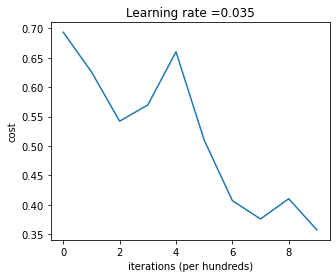

In [32]:
parameters_4_layers = model(train_L_X, train_L_y, layers_dim, 10000, 0.035)

In [33]:
# Print accuracy
test_predictions = predict(train_L_X, parameters_4_layers)
print ('Accuracy: %d' % float((np.dot(train_L_y,test_predictions.T) + np.dot(1-train_L_y,1-test_predictions.T))/float(train_L_y.size)*100) + '%')

Accuracy: 83%


## Test

In [34]:

file_dir = '/kaggle/input/dogs-vs-cats/train/train/'
test_L_y = np.zeros(testing_length, int)
test_L_X = np.zeros([testing_length, num_px, num_px, 3],dtype=np.uint8)

for index, file_name in enumerate(os.listdir(file_dir)[training_length + 1:]):
    if index < testing_length and (file_name.startswith('cat') or file_name.startswith('dog')) :   
        image = pil.Image.open(file_dir + file_name)
        image = image.resize((num_px , num_px))
        test_L_X[index,] = np.array(image)    
        image.close()

        if file_name.startswith('cat'):
            test_L_y[index] = 0
        else :
            test_L_y[index] = 1

test_L_X = test_L_X / 255.
test_L_X = test_L_X.reshape(test_L_X.shape[0], -1).T
test_L_y = test_L_y.T.reshape([1, testing_length])    

In [35]:
test_L_X.shape

(30000, 1000)

In [36]:
# Print accuracy
test_predictions = predict(test_L_X, parameters_4_layers)
print ('Accuracy: %d' % float((np.dot(test_L_y,test_predictions.T) + np.dot(1 - test_L_y, 1 - test_predictions.T))/float(test_L_y.size)*100) + '%')

Accuracy: 59%
